In [6]:
!pip install geopandas rioxarray -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 75.1 MB/s eta 0:00:00


In [2]:
# Bibliotecas
import numpy as np
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import rioxarray

In [24]:
# Definindo função
def tif_to_points(filename):
  rio_dataset = rioxarray.open_rasterio(filename)
  rio_dataset.name = "DN"
  df = rio_dataset.squeeze().to_dataframe().reset_index()
  geom = gpd.points_from_xy(df.x, df.y)
  gdf = gpd.GeoDataFrame(df, crs=rio_dataset.rio.crs, geometry=geom)
  gdf.to_file('points.shp')

In [ ]:
# Aplicando
tif_to_points('NDVI.tif')

<Axes: >

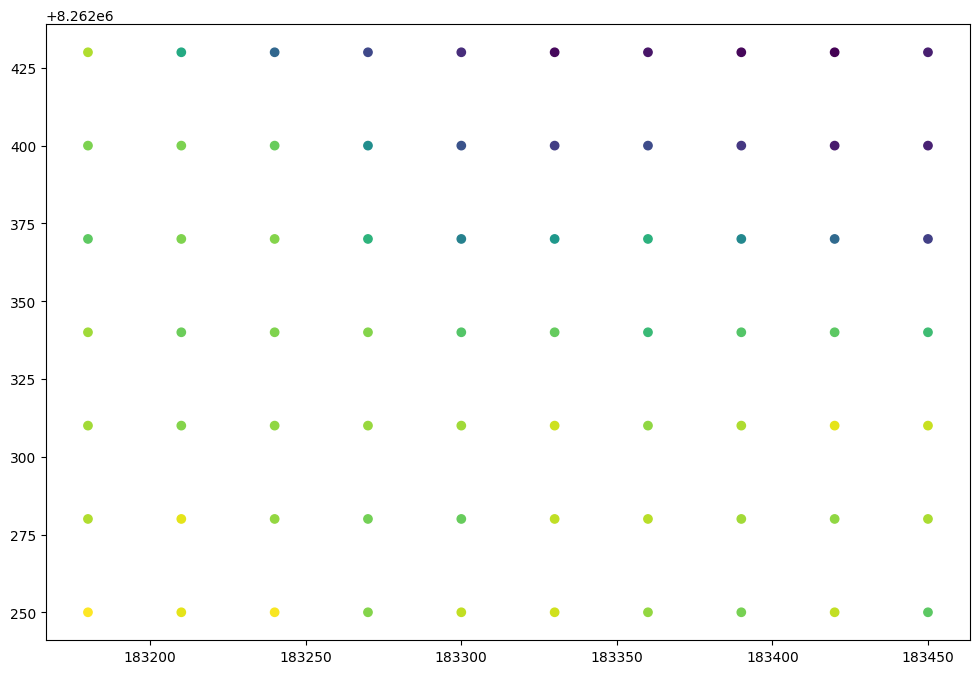

In [26]:
# Visualizando pontos
pts = gpd.read_file('points.shp')
pts.plot(column='DN', figsize=(12,8))